**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: HIRAM GARCIA AUSTRIA
*   MATRÍCULA: A00378771

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Ciencia y Analitica de Datos/Modulo 4: Exploracion de datos"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [20]:
# Lista de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [21]:
# Lista de variables categóricas
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

Hay 8 columnas numericas:
1. person_age,
2. person_income
3. person_emp_length
4. loan_amnt
5. loan_int_rate
6. loan_status
7. loan_percent_income
8. cb_person_cred_hist_length

Hay 4 columnas cualitativas:
1. person_home_ownership
2. loan_intent
3. loan_grade
4. cb_person_default_on_file

 2. Determina el porcentaje de valores faltantes por columna.

In [9]:
total = len(df)

na_person_age = pd.isna(df.person_age).sum()
na_person_income = pd.isna(df.person_income).sum()
na_person_emp_length = pd.isna(df.person_emp_length).sum()
na_loan_amnt = pd.isna(df.loan_amnt).sum()
na_loan_int_rate = pd.isna(df.loan_int_rate).sum()
na_loan_status = pd.isna(df.loan_status).sum()
na_loan_percent_income = pd.isna(df.loan_percent_income).sum()
na_cb_person_cred_hist_length = pd.isna(df.cb_person_cred_hist_length).sum()
na_person_home_ownership = pd.isna(df.person_home_ownership).sum()
na_loan_intent = pd.isna(df.loan_intent).sum()
na_loan_grade = pd.isna(df.loan_grade).sum()
na_cb_person_default_on_file = pd.isna(df.cb_person_default_on_file).sum()

print('Porcentaje de valores faltantes:')
print('person_age: {}%'.format(na_person_age/total*100))
print('person_income: {}%'.format(na_person_income/total*100))
print('person_emp_length: {}%'.format(na_person_emp_length/total*100))
print('loan_amnt: {}%'.format(na_loan_amnt/total*100))
print('loan_int_rate: {}%'.format(na_loan_int_rate/total*100))
print('loan_status: {}%'.format(na_loan_status/total*100))
print('loan_percent_income: {}%'.format(na_loan_percent_income/total*100))
print('cb_person_cred_hist_length: {}%'.format(na_cb_person_cred_hist_length/total*100))
print('person_home_ownership: {}%'.format(na_person_home_ownership/total*100))
print('loan_intent: {}%'.format(na_loan_intent/total*100))
print('loan_grade: {}%'.format(na_loan_grade/total*100))
print('cb_person_default_on_file: {}%'.format(na_cb_person_default_on_file/total*100))

Porcentaje de valores faltantes:
person_age: 0.0%
person_income: 0.0%
person_emp_length: 2.7469997851508547%
loan_amnt: 0.0%
loan_int_rate: 9.563856235229121%
loan_status: 0.0%
loan_percent_income: 0.0%
cb_person_cred_hist_length: 0.0%
person_home_ownership: 0.0%
loan_intent: 0.0%
loan_grade: 0.0%
cb_person_default_on_file: 0.0%


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [15]:
df.shape

(32581, 12)

In [14]:
#Antes del EDA se deben borrar las variables que tienen un único valor y las que tienen todos los valores diferentes
# porque no aportarán al análisis ni a los modelos predictivos en fases posteriores.
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [16]:
# media (mean), mediana (50%), min, max, desviacion estandar (std), cuartiles (25%, 50%, 75%)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [13]:
columnas = ['person_age', 'person_income', 'person_emp_length',	'loan_amnt',	'loan_int_rate', 'loan_status',	'loan_percent_income',	'cb_person_cred_hist_length']

# Calcular skew() y kurt() para todas las columnas
pd.DataFrame({'Asimetria': df[columnas].skew(), 'Curtosis': df[columnas].kurt()})

,Asimetria,Curtosis
person_age,2.581393,18.560825
person_income,32.865349,2693.272776
person_emp_length,2.614455,43.722338
loan_amnt,1.192477,1.423565
loan_int_rate,0.208550,-0.671609
loan_status,1.364888,-0.137088
loan_percent_income,1.064669,1.223687
cb_person_cred_hist_length,1.661790,3.716194


Clasificacion:

person_age: tiene asimetría positiva (sesgo a la derecha), y curtosis leptokurtica.

loan_in_rate: tiene asimetría positiva (sesgo a la derecha), y curtosis platicurtica.


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

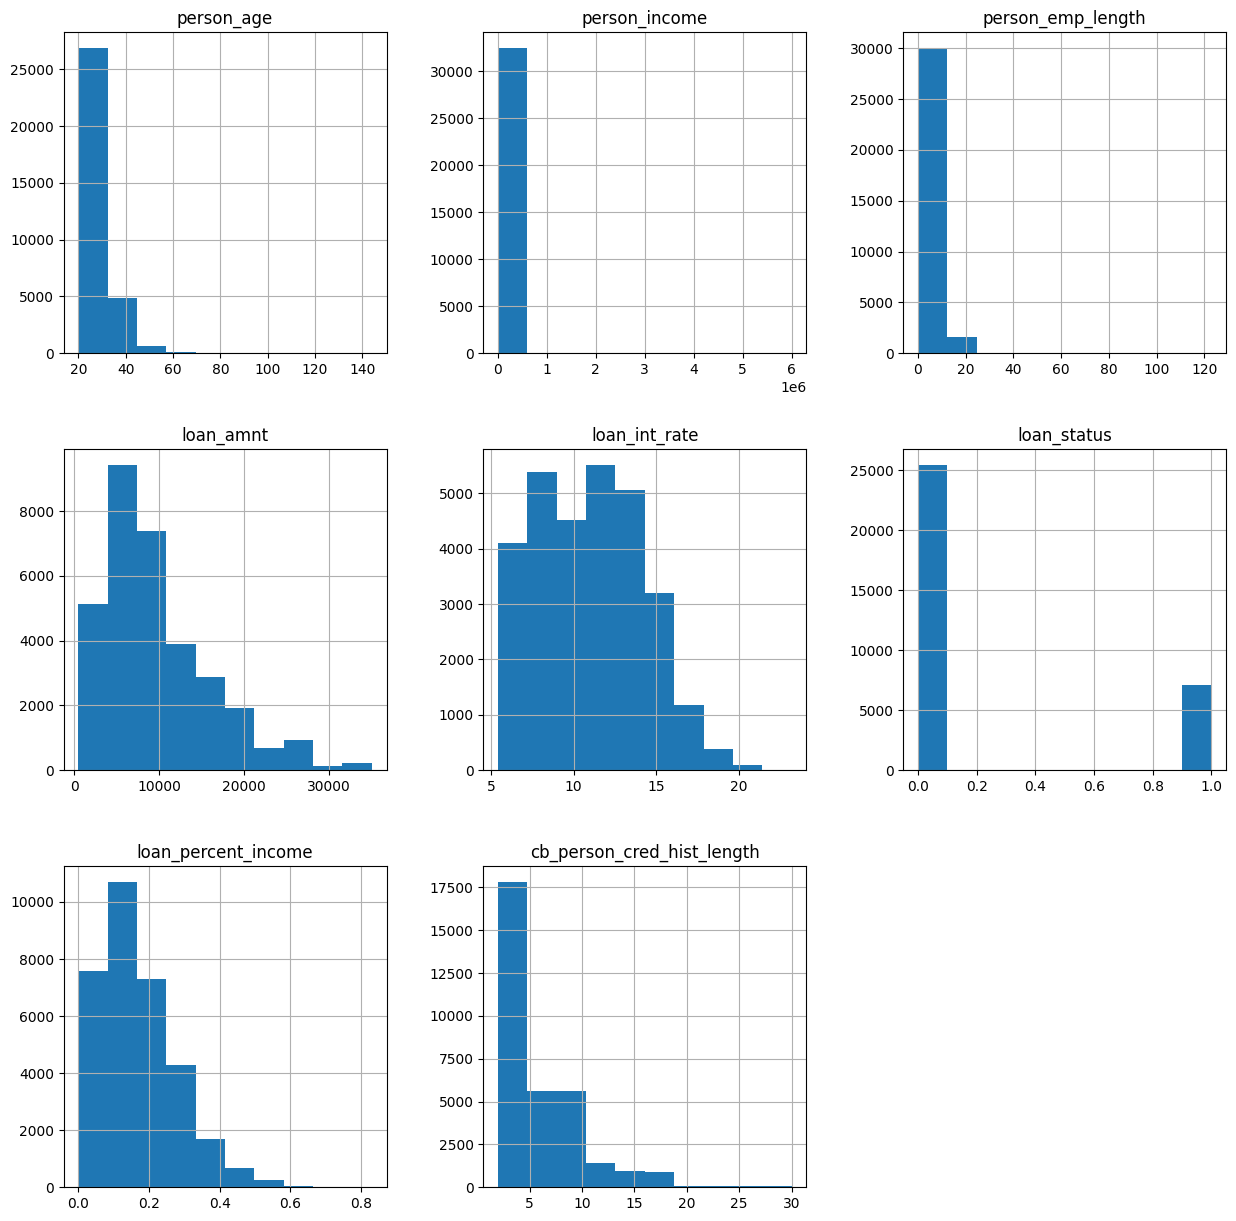

In [26]:
# Pandas
df.hist(figsize=(15,15))
plt.show()

La asimetría positiva significa que la cola de la distribución está sesgada hacia la derecha, lo que implica que hay más valores concentrados en la parte izquierda de la distribución (valores más bajos) y que hay algunos valores relativamente altos en la parte derecha de la distribución.

Todas las variables tiene sesgo a la derecha.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

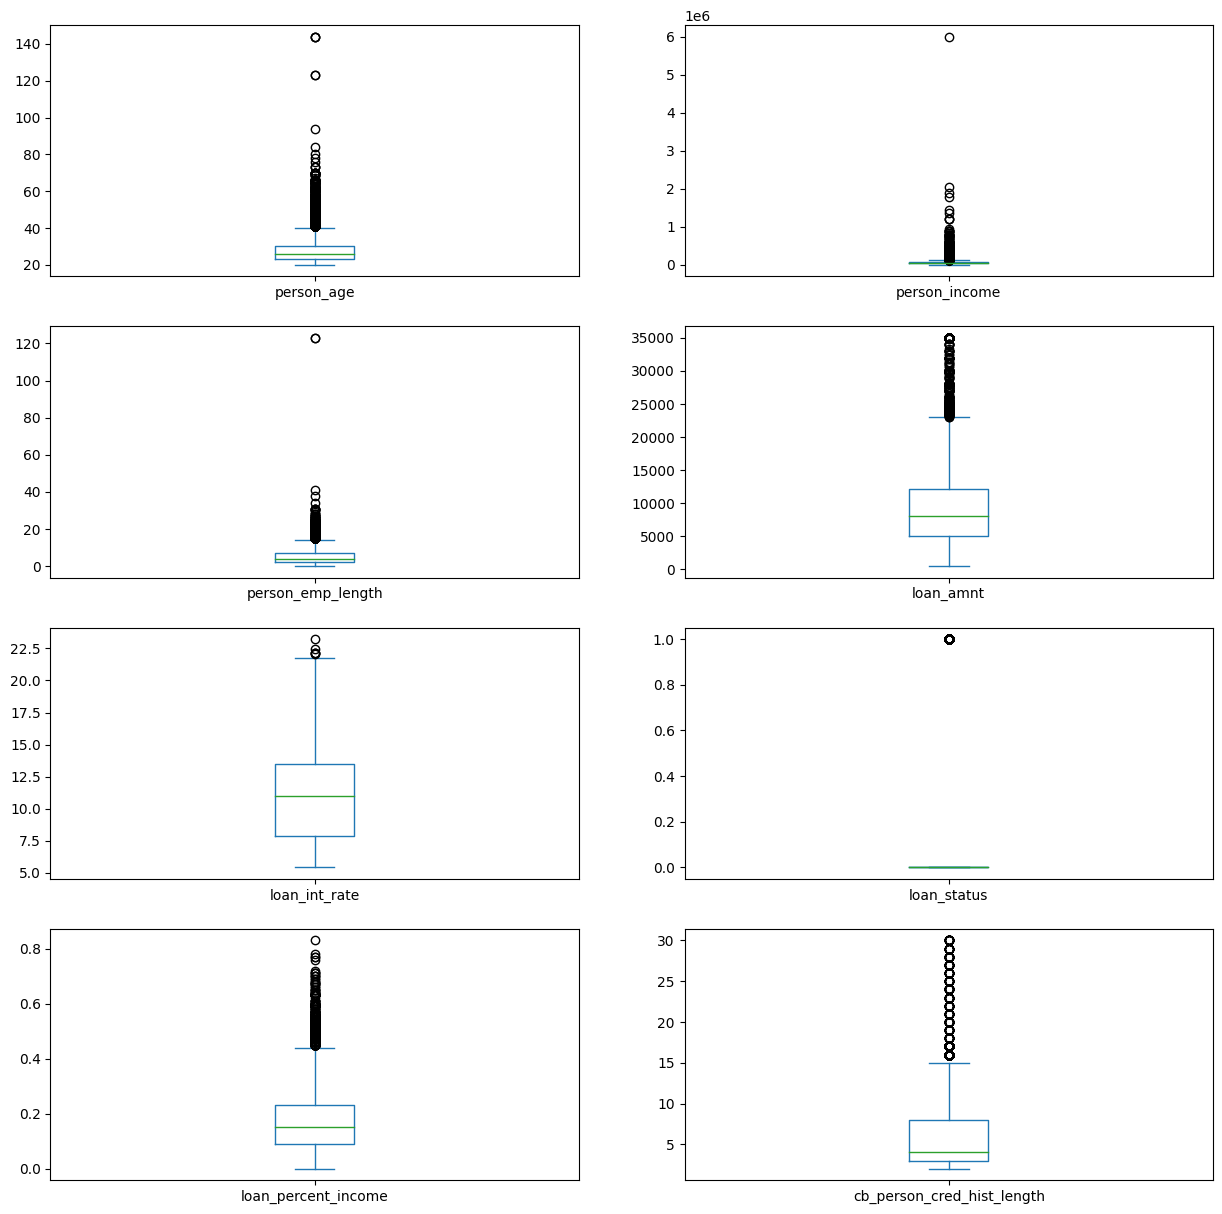

In [25]:
# Se combinan las plataformas:
# - Matplotlib para crear la matriz de subgráficos
# - Pandas para dibujar los boxplots

fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  df[col].plot(kind='box', ax=ax) # ---> Pandas

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [27]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [29]:
# Estadísticas descriptivas de las variables de texto
# Moda = top
# Cardinalidad = unique
df.describe(include = 'object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [32]:
# Recuentos unicos - person_home_ownership
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [33]:
# Recuentos unicos - loan_intent
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [34]:
# Recuentos unicos - loan_grade
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [35]:
# Recuentos unicos - cb_person_default_on_file
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

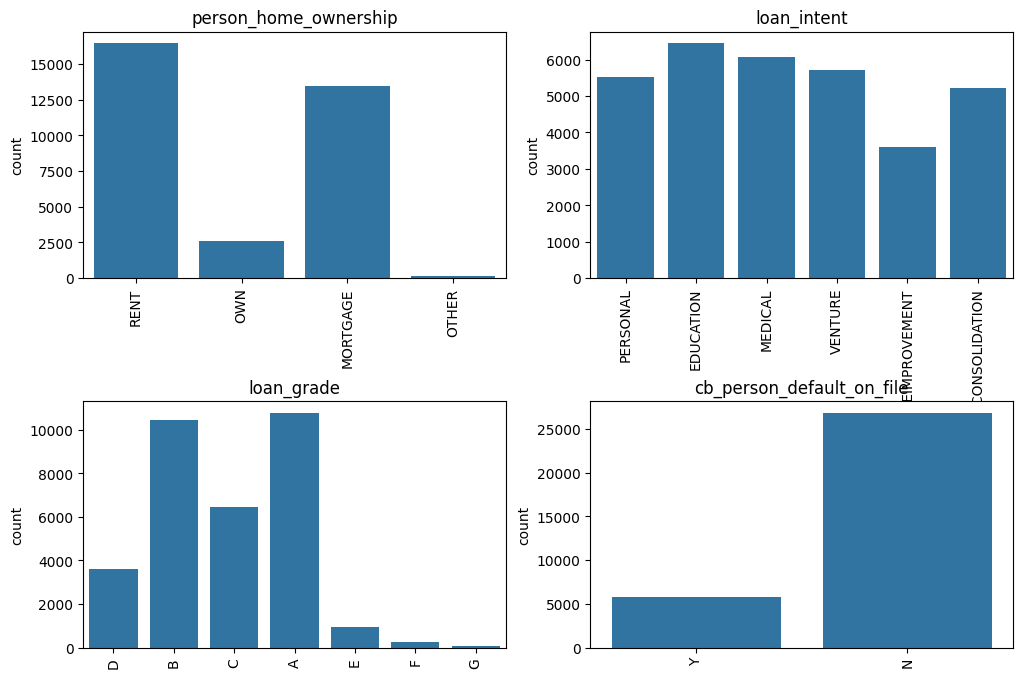

In [37]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<Axes: title={'center': 'loan_percent_income'}, xlabel='loan_status'>

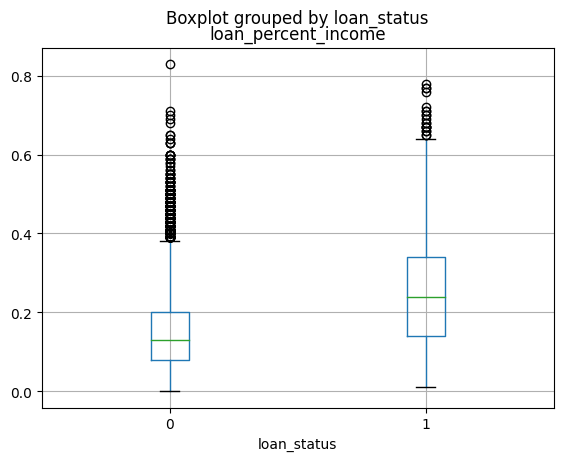

In [41]:
# Pandas
df.boxplot(column='loan_percent_income', by='loan_status')

Las personas que no tienen incumplimiento (0), son las que tienen mas valores atipicos, y el 75% de ellos tiene una relacion prestamo-ingreso menor al 20%.

Por otro lado, las personas que tienen incumplimiento (1), tienen menos valores atipicos, pero son mas extremos que los de los demas. El 75% de las personas tiene una relacion prestamo-ingreso menor al 35%.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

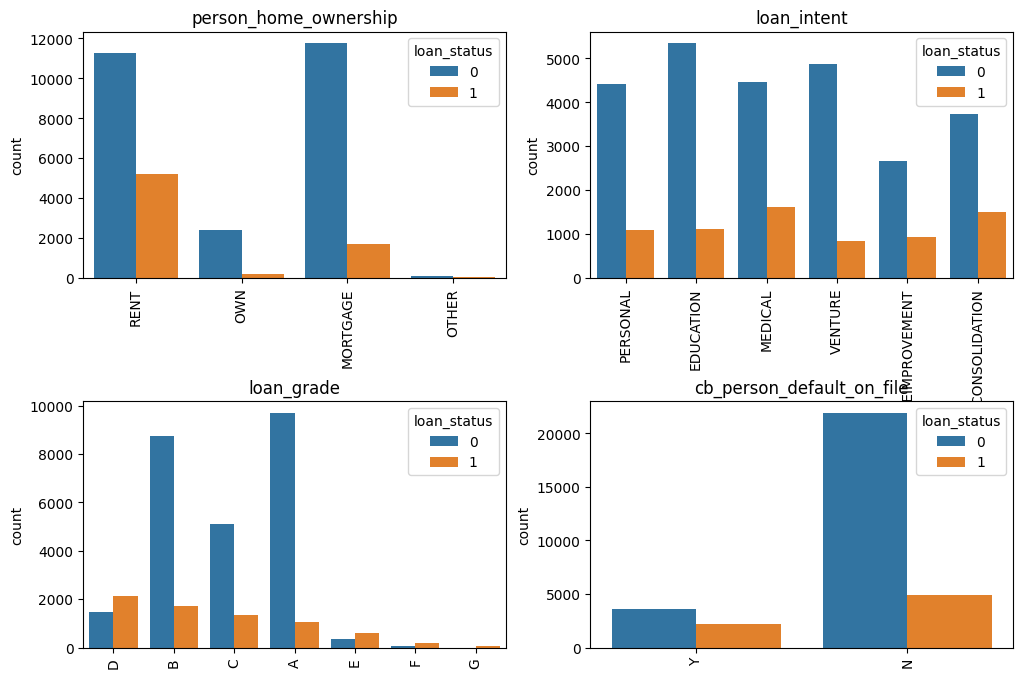

In [45]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], hue=df["loan_status"], data=df, ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

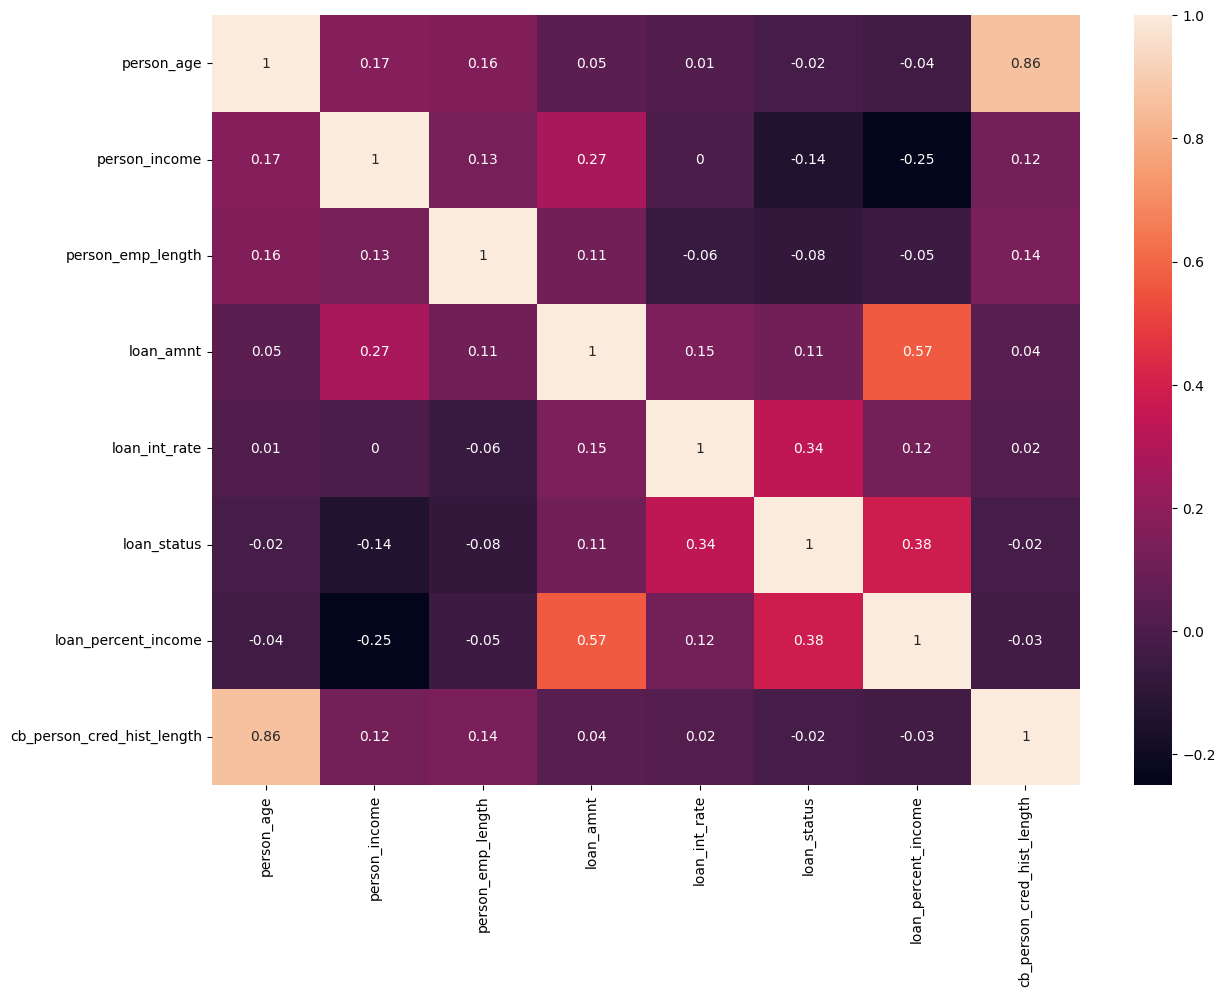

In [47]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True) # ---> Seaborn

loan_percent_income es la variable que tiene mas correlacion con loan_status, ya que tiene el valor mas alto (0.38), aun asi no es una correlacion muy fuerte.